In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from character_engine.player_character import npc
from scipy.spatial import Voronoi, voronoi_plot_2d,  cKDTree
import random


class map():

    def __init__(self, name="Map", size=1024):
        self.name = name
        self.size = int(size**0.5)
        self.coord = np.zeros((self.size,self.size),dtype="int")

        self.location_coordinates = {}
        self.location_events = {}
        self.vors = {}

        self.interactions = {}
         

    def place_character(self):
        return [random.uniform(0.1,float(self.size)) for i in range(2)]

    def populate_map(self, n_locations=10, name="Regions", is_event=False, plot = False):

        centroids = [tuple([random.uniform(0.1,float(self.size)) for i in range(2)]) for i in range(n_locations)]

        centroids_rounded = [[float(format(centroid[0], '.2f')),float(format(centroid[1], '.2f'))] for centroid in centroids]

        vor = Voronoi(centroids_rounded)

        if not plot:
            fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black',line_width=0.5, line_alpha=0.6, point_size=1)
            fig.set_size_inches(18.5, 10.5)

            for region in vor.regions:

                if not -1 in region:
                    polygon = [vor.vertices[i] for i in region]
                    plt.fill(*zip(*polygon),alpha=0.4)
                    plt.xlim(right=0, left=self.size)
                    plt.ylim(bottom=0, top=self.size)

        self.vors[name] = vor

        self.location_coordinates[name] = vor.points

        self.location_events[name] = is_event

        return vor

    def event_starter(self, event, player):

        location = player.location

        if event == "ambush":

            goblin = npc("Grognag",self,xp=20,p_health=15)

            player.battle(goblin, "Goblin Ambush")


    def check_region(self,coordinates):
        
        points = self.vor.points

        voronoi_kdtree = cKDTree(points)

        dst, regions = voronoi_kdtree.query(coordinates)
        
        return regions

    def create_regions(self, name, potential_regions,region_weights = np.nan, plot=False):

        if region_weights != region_weights:
        
            region_weights = [(1/len(potential_regions)) for i in range(len(potential_regions))]
        
        types = {}
                
        for i in range(0,len(self.vors[name].regions)):    

            types[str(self.vors[name].regions[i])] = (random.choices(list(potential_regions.keys()), weights =region_weights,k=1))[0]

        if not plot:
        
            fig = voronoi_plot_2d(self.vors[name], show_vertices=False, line_colors='white',line_width=0.0, line_alpha=0.0, point_size=1)
            fig.set_size_inches(18.5, 10.5)

        if not plot:
        
            for region in self.vors[name].regions:
                
                if not -1 in region:
                
                    polygon = [self.vors[name].vertices[i] for i in region]
    
                    plt.fill(*zip(*polygon),color=potential_regions[types[str(region)]],alpha=0.4)
    
                plt.xlim(right=0, left=self.size)
                plt.ylim(bottom=0, top=self.size)

        regions = {}
        
        for region in map.vors["terrain"].regions:

            neighbor_list = []
        
            for pot_neighbor in map.vors["terrain"].regions:
            
                if len(np.intersect1d(map.vors["terrain"].vertices[region], map.vors["terrain"].vertices[pot_neighbor])) >= 2:
                
                    neighbor_list.append(pot_neighbor)
        
            regions[str(region)] = neighbor_list


        return types
        

In [ ]:
map = map(name="Gothenburg")

In [ ]:
map.populate_map(10, name="terrain")

possible_terrains = {"Water":"#3396ff","Mountains":"#a7a7a7","Grassland":"#53e939"}

map.create_regions("terrain", possible_terrains)

In [ ]:
map.vors["terrain"].vertices[map.vors["terrain"].regions[0]]

In [ ]:
map.vors["terrain"].vertices[map.vors["terrain"].regions[1]]

In [ ]:
c = map.vors["terrain"].vertices[map.vors["terrain"].regions[2]]

In [ ]:
len(np.intersect1d(c,b))/2

In [ ]:


regions = {}

for region in map.vors["terrain"].regions:

    neighbor_list = []

    for pot_neighbor in map.vors["terrain"].regions:

        if len(np.intersect1d(map.vors["terrain"].vertices[region], map.vors["terrain"].vertices[pot_neighbor])) >= 2:

            neighbor_list.append(pot_neighbor)

    regions[str(region)] = neighbor_list



In [ ]:
regions[str(map.vors["terrain"].vertices[map.vors["terrain"].regions[1]])]

In [ ]:
    
centroids = [tuple([random.uniform(0.1,float(1024)) for i in range(2)]) for i in range(10)]

    
centroids_rounded = [[float(format(centroid[0], '.2f')),float(format(centroid[1], '.2f'))] for centroid in centroids]

In [ ]:
centroids

In [ ]:
np.random.randint(0, 1024, (514, 2))

In [1]:
from map_manager.map_generator import map
from tools.lloyd_relaxation import relax, voronoi
import numpy as np
import matplotlib.pyplot as plt
from character_engine.player_character import npc
from scipy.spatial import Voronoi, voronoi_plot_2d,  cKDTree
import random

In [2]:
deniz = map()

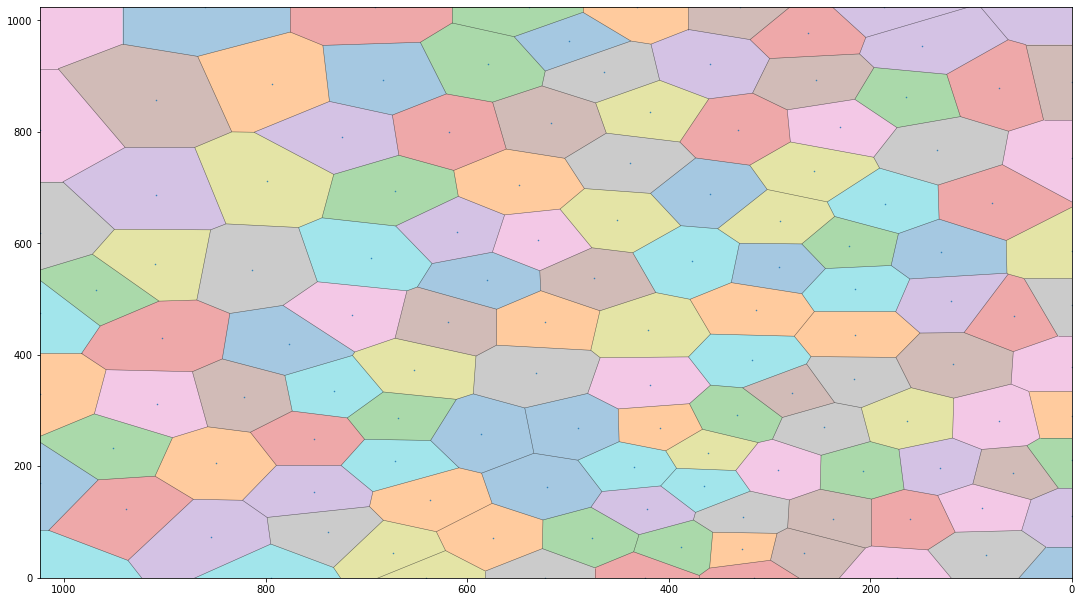

In [29]:
deniz.populate_map(n_locations=128, print=True,relaxed=True,k=100)

In [30]:
from noise import snoise3

def noise_map(size, res, seed, octaves=1, persistence=0.5, lacunarity=2.0):
    scale = size/res
    return np.array([[
        snoise3(
            (x+0.1)/scale,
            y/scale,
            seed,
            octaves=octaves,
            persistence=persistence,
            lacunarity=lacunarity
        )
        for x in range(size)]
        for y in range(size)
    ])



In [31]:
from skimage.draw import polygon

def voronoi_map(vor, size):
    # Calculate Voronoi map
    vor_map = np.zeros((size, size), dtype=np.uint32)

    for i, region in enumerate(vor.regions):
        # Skip empty regions and infinte ridge regions
        if len(region) == 0 or -1 in region: continue
        # Get polygon vertices    
        x, y = np.array([vor.vertices[i][::-1] for i in region]).T
        # Get pixels inside polygon
        rr, cc = polygon(x, y)
        # Remove pixels out of image bounds
        in_box = np.where((0 <= rr) & (rr < size) & (0 <= cc) & (cc < size))
        rr, cc = rr[in_box], cc[in_box]
        # Paint image
        vor_map[rr, cc] = i

    return vor_map


In [32]:
a = voronoi_map(deniz.vors["Regions"], size)

In [33]:
a

array([[ 1,  1,  1, ..., 23, 23, 23],
       [ 1,  1,  1, ..., 23, 23, 23],
       [ 1,  1,  1, ..., 23, 23, 23],
       ...,
       [59, 59, 59, ..., 10, 10, 10],
       [59, 59, 59, ..., 10, 10, 10],
       [59, 59, 59, ..., 10, 10, 10]], dtype=uint32)

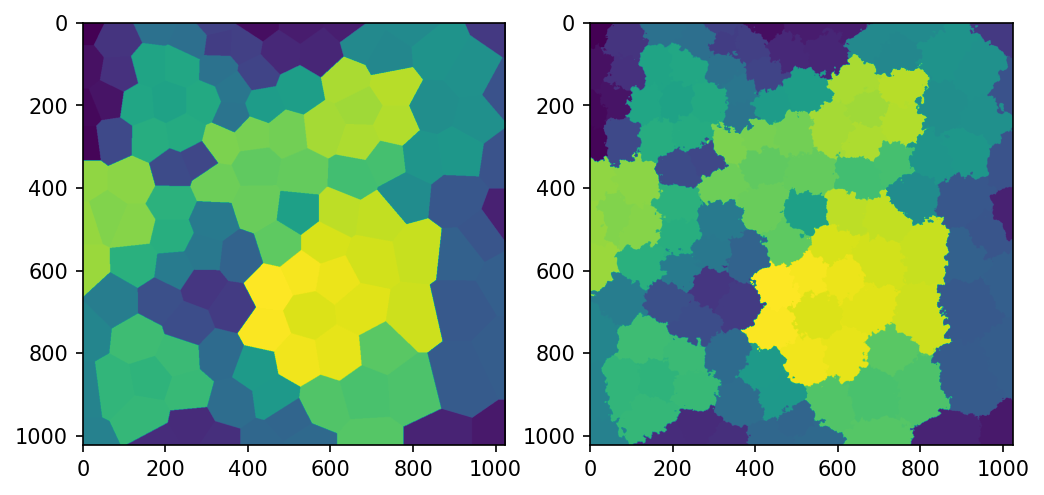

In [37]:
size=1024

boundary_displacement = 20
boundary_noise = np.dstack([noise_map(size, 32, 120, octaves=8), noise_map(size, 32, 250, octaves=8)])
boundary_noise = np.indices((size, size)).T + boundary_displacement*boundary_noise
boundary_noise = boundary_noise.clip(0, size-1).astype(np.uint32)

blurred_vor_map = np.zeros_like(a)

for x in range(size):
    for y in range(size):
        j, i = boundary_noise[x, y]
        blurred_vor_map[x, y] = a[i, j]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(150)
fig.set_size_inches(8, 4)
axes[0].imshow(a)
axes[1].imshow(blurred_vor_map)